In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/Timeseries-365/Index2018/Index2018.csv")
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


#### stock market data from different countries like USA, Germany, UK, Japan where minimum of ftse is grater than spx company

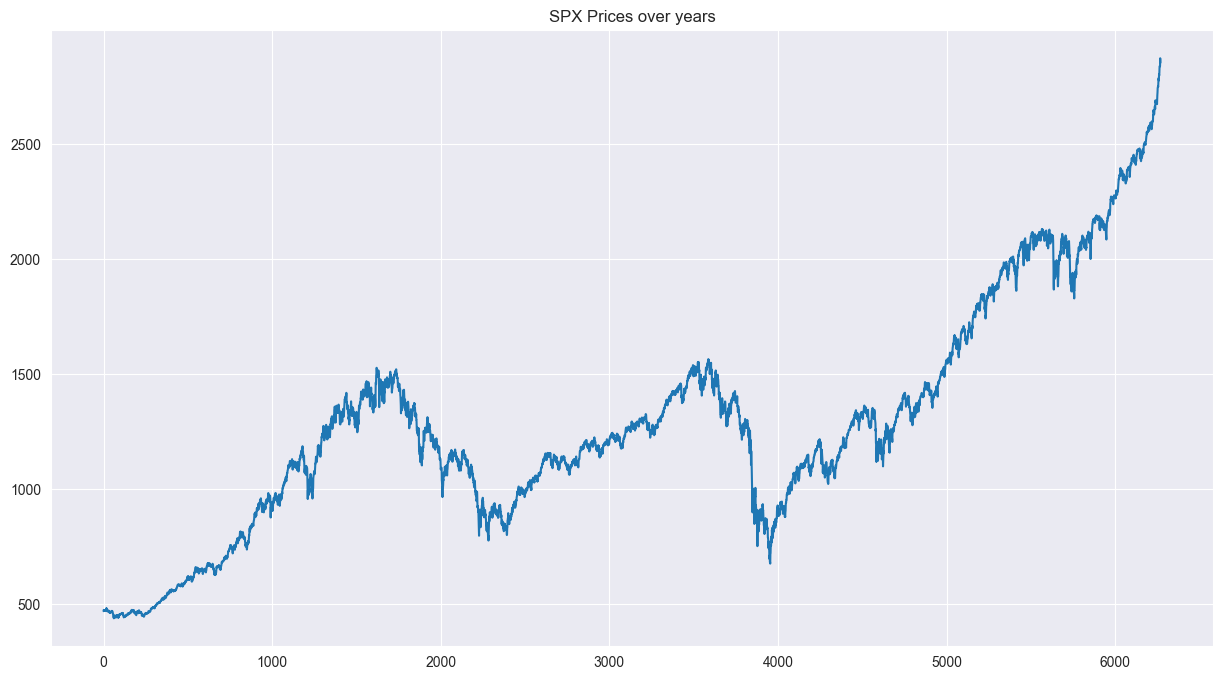

In [4]:
data.spx.plot(figsize=(15,8),title='SPX Prices over years')
plt.show()

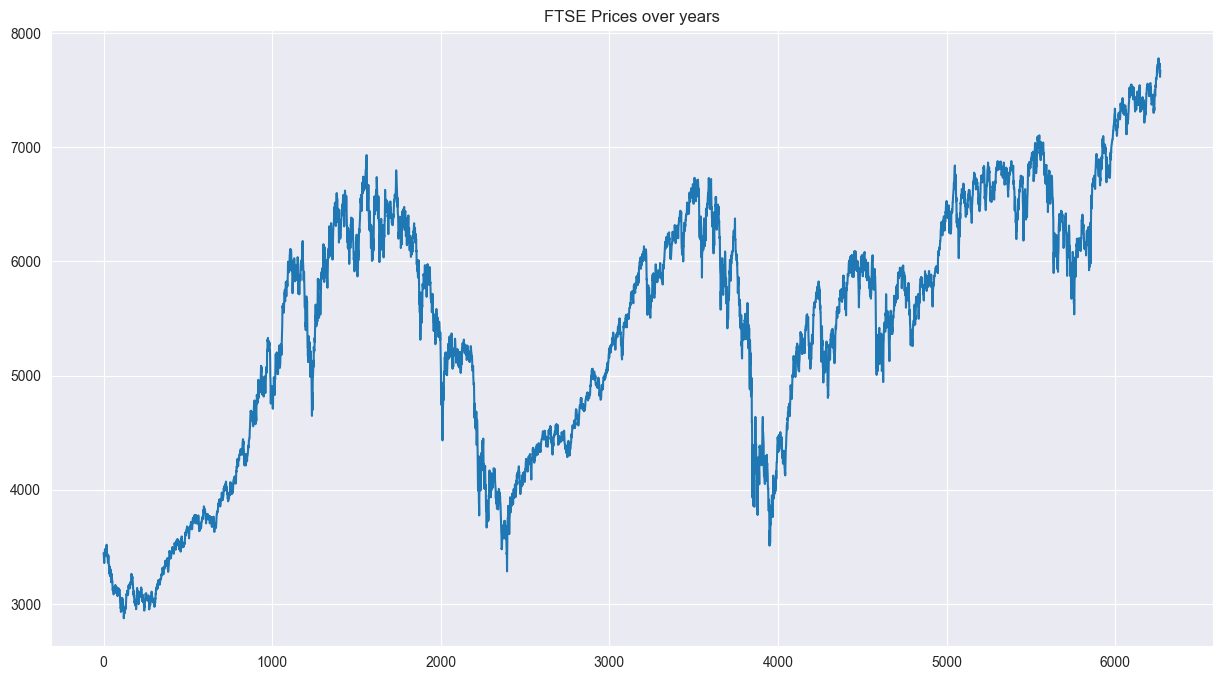

In [5]:
data.ftse.plot(figsize=(15,8),title='FTSE Prices over years')
plt.show()

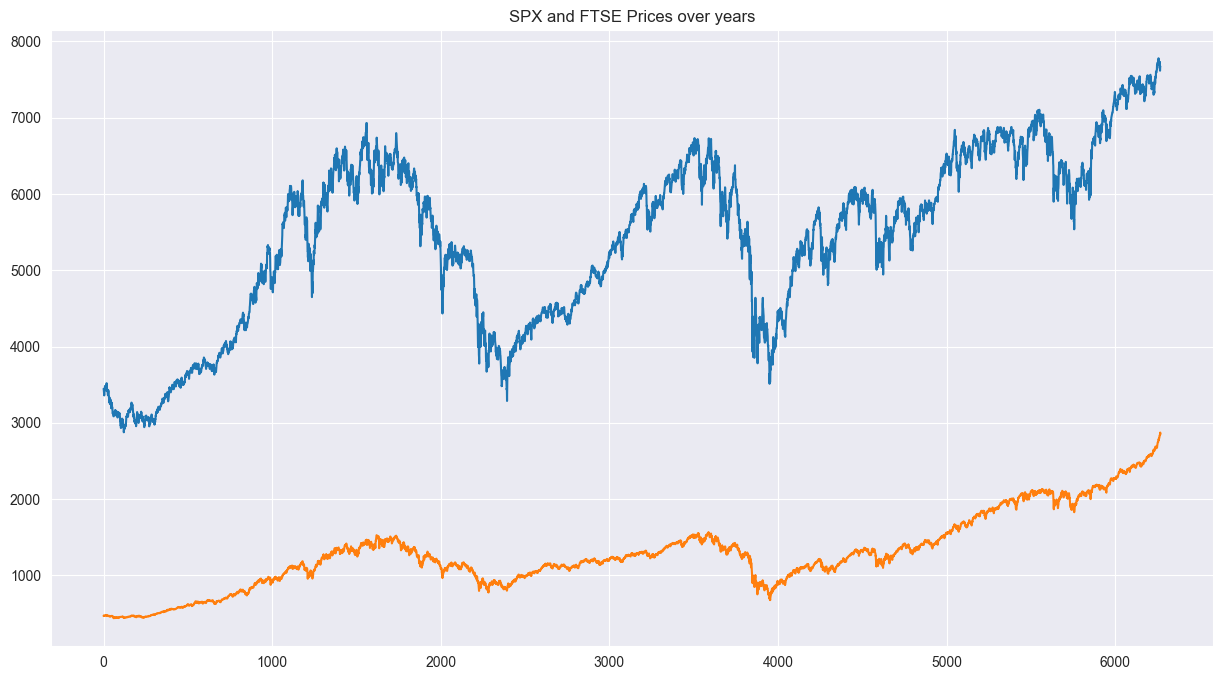

In [6]:
data.ftse.plot(figsize=(15,8),title='FTSE Prices over years')

data.spx.plot(figsize=(15,8),title='SPX Prices over years')
plt.title('SPX and FTSE Prices over years')
plt.show()

### Quantile-Quantile Plot (QQ plot) :
##### use it to determine whether a dataset is distributed a certain way
##### usually showcases how the data fits a normal distribution

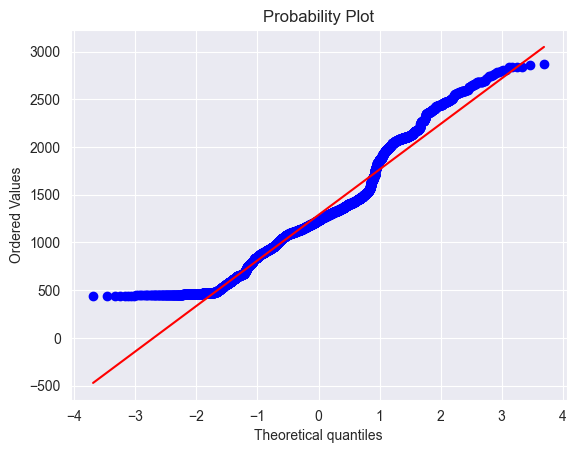

In [7]:
import scipy.stats
import pylab

scipy.stats.probplot(data.spx, plot=pylab)
pylab.show()

#### y-axis : show the prices
#### x-axis: how many stds away from the mean these values are
#### the red line means to be normally distributed they have to follow red line ( here it's not normally distributed since the blue line bottom side has more data which away from the red line

In [8]:
data.date = pd.to_datetime(data.date, dayfirst=True)
data.head(5)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [9]:
print('lowest date :',data['date'].min())
print('latest date :',data['date'].max())

lowest date : 1994-01-07 00:00:00
latest date : 2018-01-29 00:00:00


In [10]:
data.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [11]:
#setting date column as index
data.set_index('date', inplace=True)

In [12]:
#setting desired frequency
data = data.asfreq('d')
data.head(5)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


##### by using asfreq we have created new dates/periods which don't have associated values with them

In [13]:
data = data.asfreq('b') #b=business days
data.head(5)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


##### when we put 'd' as frequency we have seen there are missing values for those days which actually were weekends and that's why used 'b' which only counts working days

In [14]:
data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [15]:
data = data.fillna(data.mean())
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

##### now we do not have missing values in the dataset

In [16]:
#copying spx value and dropping all the columns for fast working way

data['spx_value'] = data['spx']
data = data.drop(columns=['spx','ftse','dax','nikkei'],axis=1)
data.head(5)

,spx_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### train test split

In [17]:
size = int(len(data)*0.8)
train_df = data.iloc[:size]
test_df = data.iloc[size:]

In [18]:
train_df.tail(4)

,spx_value
date,
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [19]:
test_df.head(4)

,spx_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863


#### white noise : a special type of time series where the data does not follow a pattern. It has 3 conditions which are 1) constant mean 2)constant variance 3)no autocorrelation between any periods [ means no clear relationship between past & present values]

In [20]:
#creating white noise by taking equivalent mean and variance with same size of desired data
#loc will create same number avg. points distribution value where scale will tell how wide the data will be.

wn = np.random.normal(loc=train_df.spx_value.mean(), scale = train_df.spx_value.std(), size=len(train_df))
train_df['wn'] = wn
train_df.describe()

,spx_value,wn
count,5021.000000,5021.000000
mean,1091.699647,1095.838378
std,292.513165,292.893191
min,438.920000,100.276417
25%,914.835752,898.465337
50%,1144.726185,1092.436269
75%,1316.004350,1290.752522
max,1570.252238,2202.275015


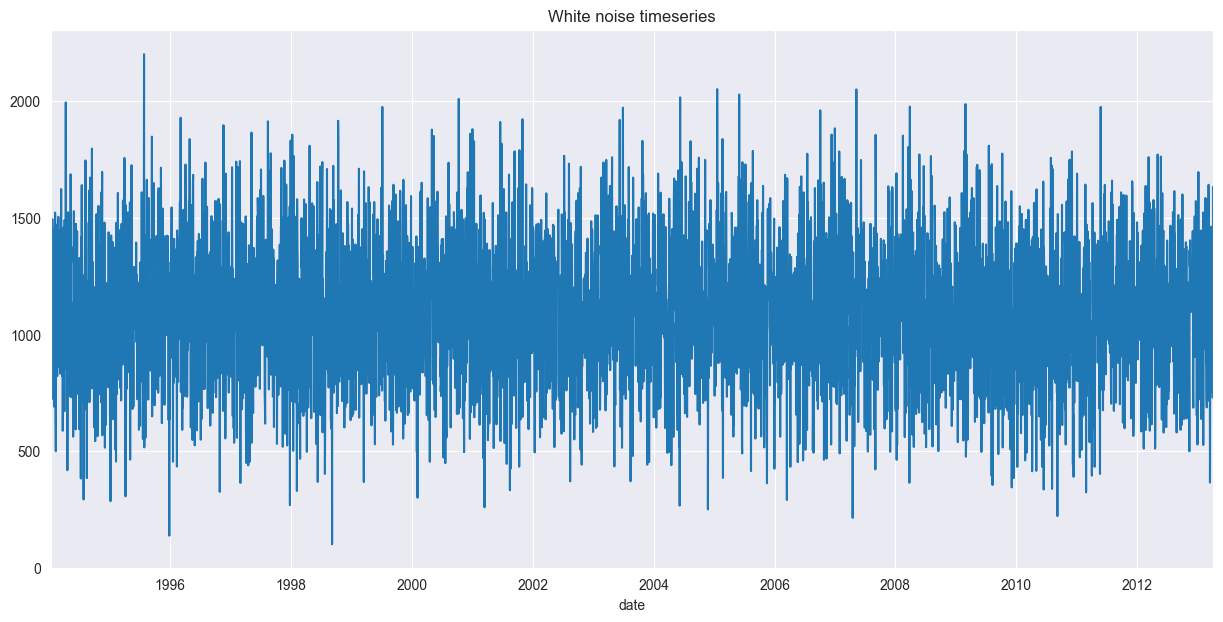

In [21]:
train_df.wn.plot(title='White noise timeseries', figsize=(15,7))
plt.show()

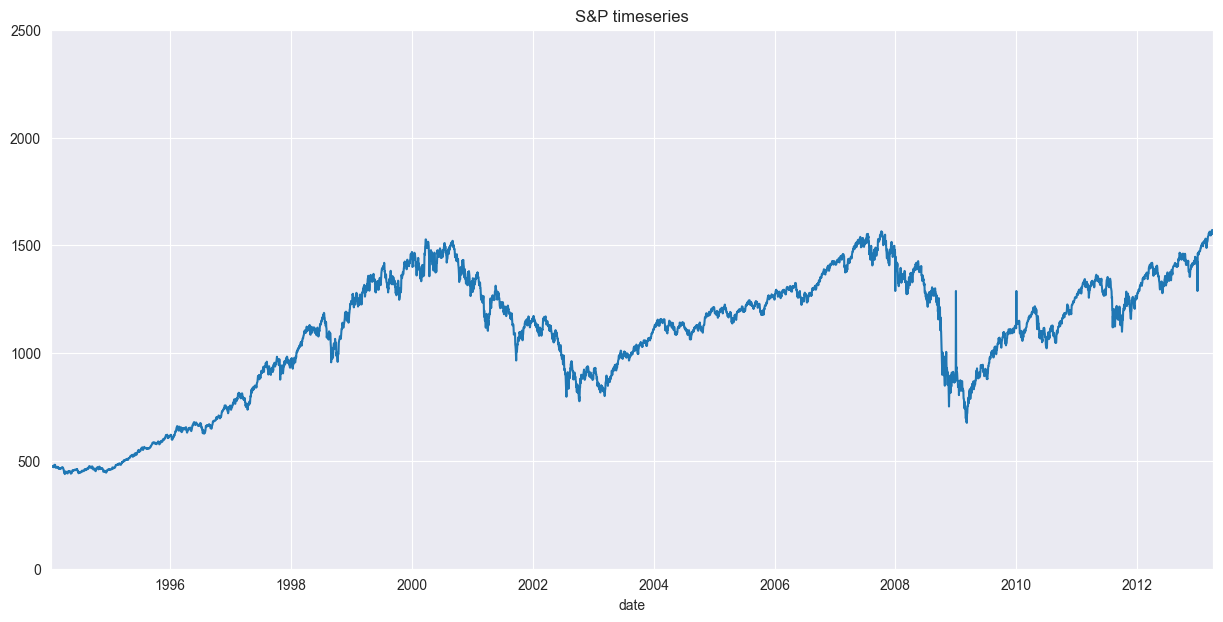

In [22]:
train_df.spx_value.plot(title='S&P timeseries', figsize=(15,7))
plt.ylim(0, 2500)
plt.show()

#### Random walk : a special type of time-series, where values tend to persist over time and the differences between periods are simply white noise

In [23]:
rw_df = pd.read_csv('D:/Timeseries-365/RandWalk/RandWalk.csv')
rw_df.date = pd.to_datetime(rw_df.date, dayfirst=True)
rw_df.set_index('date', inplace=True)
rw_df = rw_df.asfreq('b')
rw_df.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [24]:
train_df['rw'] = rw_df.price
df = train_df.copy()
df.head(3)

,spx_value,wn,rw
date,,,
1994-01-07,469.90,1004.118311,1122.139662
1994-01-10,475.27,1151.485677,1080.347860
1994-01-11,474.13,1171.341571,1082.095245


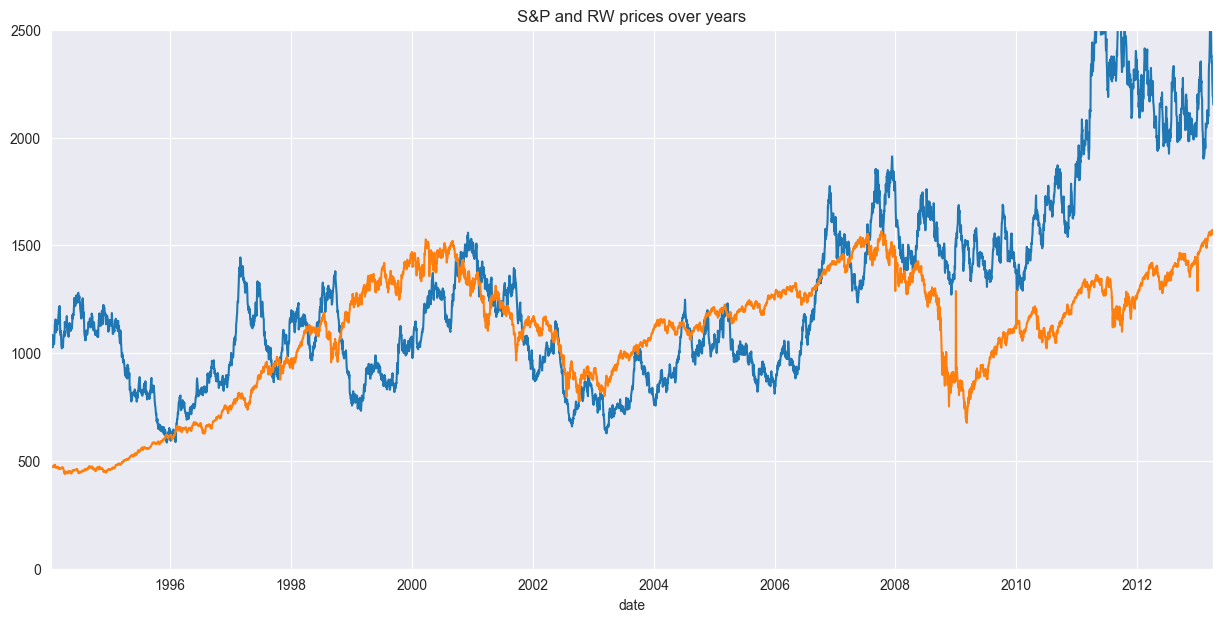

In [25]:
df.rw.plot(figsize=(15,7))
df.spx_value.plot()
plt.title('S&P and RW prices over years')
plt.ylim(0, 2500)
plt.show()

### Observations :
#### small variations between consecutive time periods
#### cyclical increases and decreases in short periods of time
##### note: if a time series resembles random walk the forcast can not be predicted with great accuracy

### Dickey-Fuller test : stationary or not?

In [26]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

sts.adfuller(data)

(1.1191300249839764,
 0.99537662766783,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 60760.017201588766)

####c observations:
##### T-statistics(upper one): since this value is greater than critical values(1%,5%,10%) so we do not have sufficient evidence of stationary T in the dataset.
##### P-value(second one) : the p-value suggests that 99% chance( not rejecting the null) the data comes from a non stationary process
##### third-value : it represents number of lags used in the regression when determining the T statistics.
##### 4th-value : it expresses the num of observations used in the analysis
##### last-value : estimates the maximized information criteria provided there is some apparent auto correlation.The lower the values, the easier it is to make predictions for the future

In [27]:
sts.adfuller(df.wn)

(-39.10075777393083,
 0.0,
 2,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 70819.8278947042)

In [28]:
sts.adfuller(df.rw)

(-1.3286073927689734,
 0.6159849181617376,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

#### Seasonality : can be decomposed into 3 terms -
##### Trend : pattern, 
##### Seasonal : Cyclical effects, 
##### Residual : Error of predictions or the difference between the actual data and the model we fit

#### 'Naive' decomposition :
##### additive : trend + seasonal + residual
##### multiplicative : trend * seasonal * residual

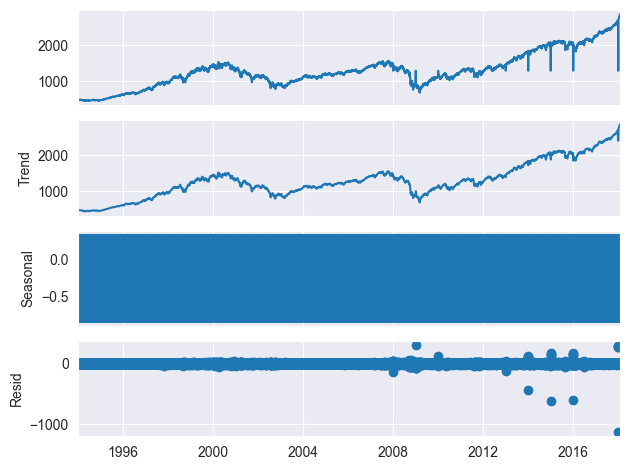

In [29]:
s_dec_add = seasonal_decompose(data, model ="additive")
s_dec_add.plot()
plt.show()

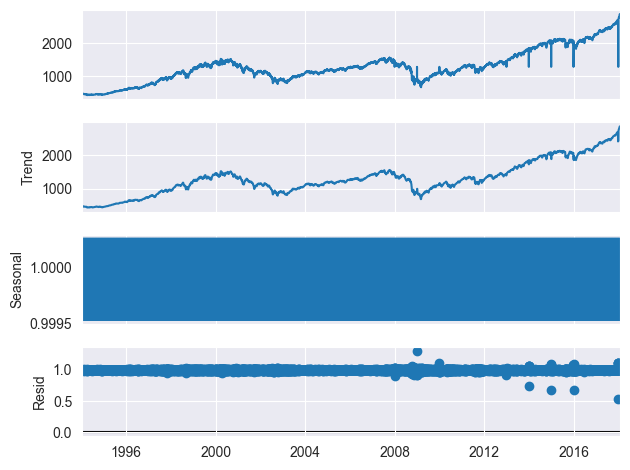

In [30]:
s_dec_mul = seasonal_decompose(data, model ="multiplicative")
s_dec_mul.plot()
plt.show()

#### Correlation : measures the similarity in the change of values of two series
#### auto-correlation : the correlation between a sequence and itself

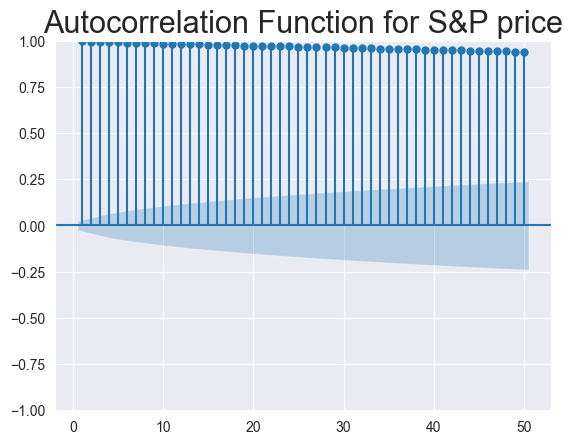

In [31]:
sgt.plot_acf(data, lags=50, zero=False) # lags 50 means last 50 periods before the current one ## zero argument means do we want to add current period values in the graph for correlation functions
plt.title('Autocorrelation Function for S&P price', size=22)
plt.show()

##### x-axis : represents number of lags
##### y-axis : represents the possible values for the auto correlation coefficient
##### as the lags getting bigger the auto correlation not persists.(the lower deep color which expands as lags number increased) 

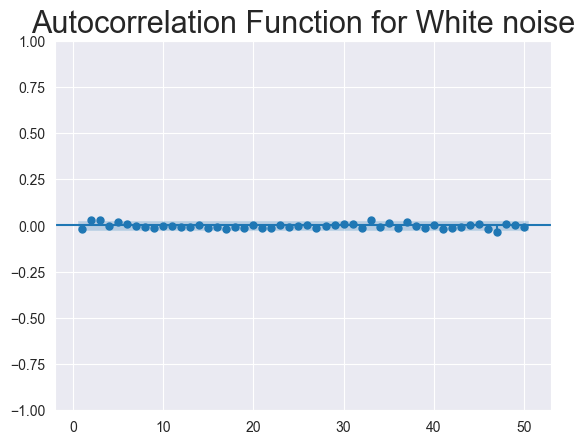

In [32]:
sgt.plot_acf(df.wn, lags=50, zero=False)
plt.title('Autocorrelation Function for White noise', size=22)
plt.show()

#### comment : there is no auto correlation for any lag

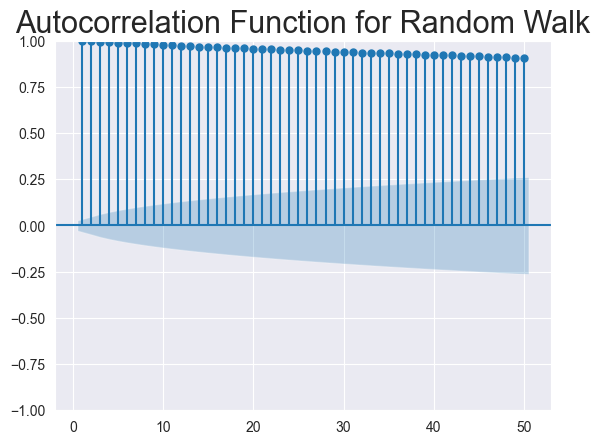

In [33]:
sgt.plot_acf(df.rw, lags=50, zero=False) 
plt.title('Autocorrelation Function for Random Walk', size=22)
plt.show()

#### Partial Auto correlation Function (PACF):

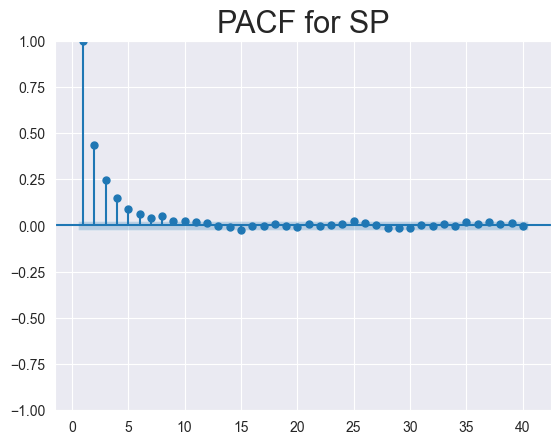

In [34]:
sgt.plot_pacf(data, lags=40, zero=False, method=('ols')) #ols = order of least squares
plt.title('PACF for SP', size=22)
plt.show()

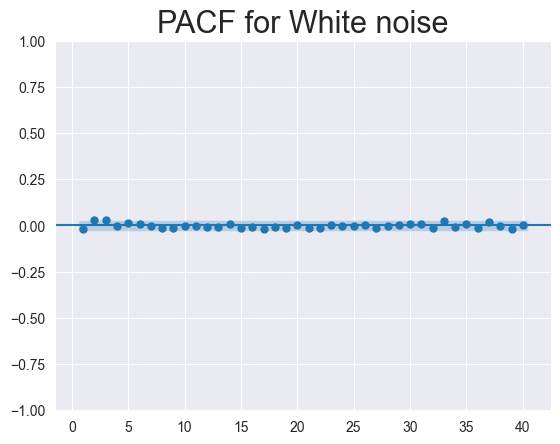

In [35]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols')) 
plt.title('PACF for White noise', size=22)
plt.show()

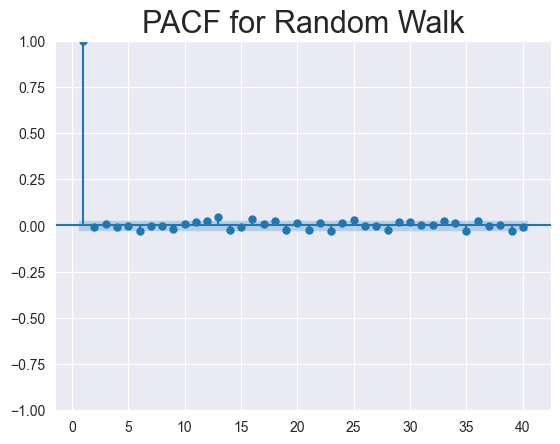

In [36]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('ols'))
plt.title('PACF for Random Walk', size=22)
plt.show()